In [2]:
import janitor
import numpy as np
import skimpy as sk
import pandas as pd
import duckdb as db
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
# ===========================================
# Data Processing and Initial Overview
# ===========================================

import os
import zipfile
import pandas as pd
import janitor  # for .clean_names()

csv_filename = "online_retail_II.csv"
zip_filename = "online_retail.zip"

# Check if CSV exists, otherwise extract from ZIP
if not os.path.exists(csv_filename):
    if os.path.exists(zip_filename):
        with zipfile.ZipFile(zip_filename, "r") as z:
            print(f"Extracting {zip_filename}...")
            z.extractall()
            # If expected CSV not found, grab first CSV in the ZIP
            if csv_filename not in z.namelist():
                for f in z.namelist():
                    if f.endswith(".csv"):
                        csv_filename = f
                        break
        print(f"Dataset loaded from {csv_filename}")
    else:
        raise FileNotFoundError(
            "❌ Dataset not found. Please provide `online_retail_II.csv` or `online_retail.zip`."
        )

# Load dataset
data = pd.read_csv(csv_filename)

# Clean column names
data = data.clean_names()

# Preview data
data.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [54]:
sk.skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ Dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 1067371 │ │ string      │ 5     │                                                         │
│ │ Number of columns │ 8       │ │ float64     │ 2     │                                                         │
│ └───────────────────┴─────────┘ │ int64       │ 1     │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column      ┃ NA     ┃ NA %              ┃ mean  ┃ sd    ┃ p0     ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ quantity    │      0 │                 0 │ 9.939 │ 172.7 │ -81000 │     1 │     3 │    10 │ 81000 │     ▇  │  │
│ │ price       │      0 │                 0 │ 4.649 │ 123.6 │ -53590 │  1.25 │   2.1 │  4.15 │ 38970 │     ▇  │  │
│ │ customer_id │ 243007 │ 22.76687299917273 │ 15320 │  1697 │  12350 │ 13980 │ 15260 │ 16800 │ 18290 │ ▇▆▇▆▇▇ │  │
│ │             │        │                 3 │       │       │        │       │       │       │       │        │  │
│ └─────────────┴────────┴───────────────────┴───────┴───────┴────────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃          ┃      ┃          ┃          ┃           ┃          ┃           ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column   ┃ NA   ┃ NA %     ┃ shortest ┃ longest   ┃ min      ┃ max       ┃ per row  ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ invoice  │    0 │        0 │ 489434   │ C489449   │ 489434   │ C581569   │     6.02 │         1 │  1067371 │  │
│ │ stockcod │    0 │        0 │ D        │ BANK      │ 10002    │ m         │     5.11 │         1 │  1067474 │  │
│ │ e        │      │          │          │ CHARGES   │          │           │          │           │          │  │
│ │ descript │ 4382 │ 0.410541 │ ?        │ 15CM      │   DOORMA │ wrongly   │     26.7 │       4.6 │  4935605 │  │
│ │ ion      │      │ 41437232 │          │ CHRISTMAS │ T UNION  │ sold sets │          │           │          │  │
│ │          │      │       23 │          │ GLASS     │ JACK     │           │          │           │          │  │
│ │          │      │          │          │ BALL 20   │ GUNS AND │           │          │           │          │  │
│ │          │      │          │          │ LIGHTS    │ ROSES    │           │          │           │          │  │
│ │ invoiced │    0 │        0 │ 2009-12- │ 2009-12-0 │ 2009-12- │ 2011-12-0 │       19 │         2 │  2134742 │  │
│ │ ate      │      │          │ 01       │ 1         │ 01       │ 9         │          │           │          │  │
│ │          │      │          │ 07:45:00 │ 07:45:00  │ 07:45:00 │ 12:50:00  │          │           │          │  │
│ │ country  │    0 │        0 │ USA      │ United    │ 

In [56]:
data = data.drop_duplicates()

In [58]:
data = db.query("""WITH desc_counts AS (
    SELECT
        stockcode,
        description,
        COUNT(*) AS desc_count
    FROM data
    WHERE description IS NOT NULL
    GROUP BY stockcode, description
),

ranked_desc AS (
    SELECT
        stockcode,
        description,
        desc_count,
        RANK() OVER (PARTITION BY stockcode ORDER BY desc_count DESC, description ASC) AS freq_rank
    FROM desc_counts
),

final_desc AS (
    SELECT
        stockcode,
        CASE
            WHEN COUNT(*) FILTER (WHERE freq_rank = 1) = 1
                THEN MAX(CASE WHEN freq_rank = 1 THEN description END)
            ELSE (
                SELECT description
                FROM (
                    SELECT
                        description,
                        ROW_NUMBER() OVER (ORDER BY description) AS rn,
                        COUNT(*) OVER (PARTITION BY stockcode) AS total
                    FROM ranked_desc rd
                    WHERE rd.stockcode = ranked_desc.stockcode
                      AND freq_rank = 1
                )
                WHERE rn = CAST((total + 1)/2 AS INT)
            )
        END AS canonical_desc
    FROM ranked_desc
    GROUP BY stockcode
)

SELECT
    d.invoice,
    d.stockcode,
    COALESCE(d.description, f.canonical_desc) AS description,
    d.quantity,
    d.price,
    d.customer_id,
    d.invoicedate,
    d.country
FROM data d
LEFT JOIN final_desc f
    ON d.stockcode = f.stockcode;""").df()

In [60]:
# ============================================================
# Feature Engineering: Create Key Analytical Columns
# ============================================================

# 1. Flag cancellations → invoices starting with "C"
data['IsCancellation'] = data['invoice'].astype(str).str.startswith('C')

# 2. Flag returns → transactions with negative quantities
data['IsReturn'] = data['quantity'] < 0

# 3. Flag giveaways → transactions where quantity <= 0 or price <= 0
data['IsGiveaway'] = (data['quantity'] <= 0) | (data['price'] <= 0)

# 4. Compute revenue = Quantity × Price
# (Revenue will be negative for returns, which is useful to analyze losses)
data['Revenue'] = data['quantity'] * data['price']

# Ensure customer_id is string
data['customer_id'] = data['customer_id'].astype(str)

# Replace NaN with 'Guest'
data['customer_id'] = data['customer_id'].replace('nan', 'Guest')

In [62]:
data = data.dropna(subset='description')

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume price_df and quantity_df are already queried from DuckDB
# Rename columns to unify
price_df = price_df.rename(columns={'price': 'value'}).assign(variable='Price')
quantity_df = quantity_df.rename(columns={'quantity': 'value'}).assign(variable='Quantity')

# Combine
df = pd.concat([price_df, quantity_df], ignore_index=True)

# Plot
plt.figure(figsize=(8,6))
sns.boxplot(x='variable', y='value', data=df)
plt.title("Boxplot of Price and Quantity")
plt.show()

NameError: name 'price_df' is not defined

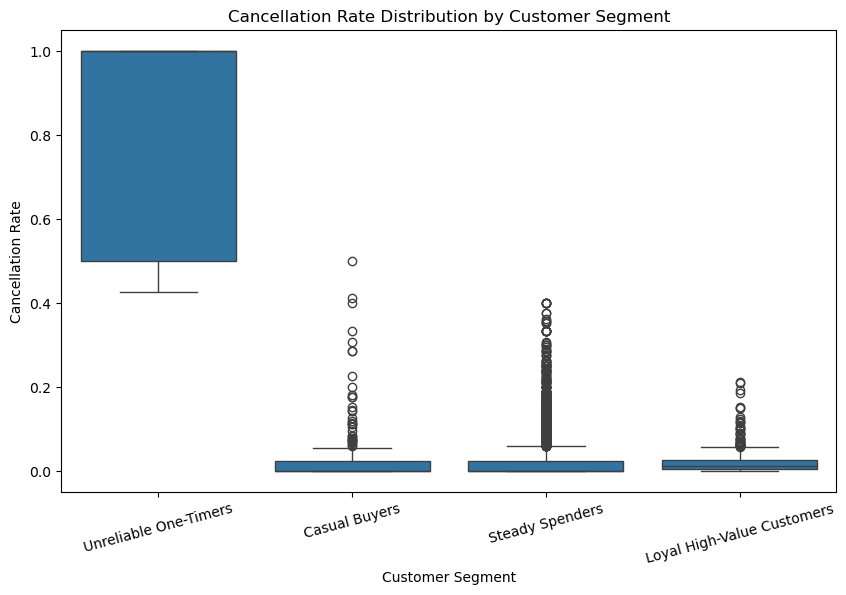

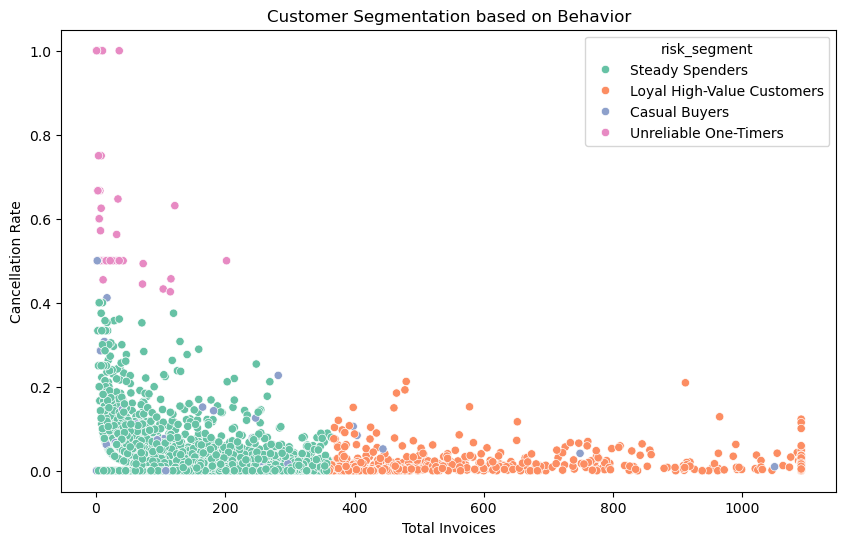

In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Prepare the data
# -----------------------------
df = data.copy()
df.columns = df.columns.str.strip()

# Keep only registered customers
df_registered = df[df['customer_id'] != 'Guest'].copy()

# Aggregate per customer
customer_features = (
    df_registered.groupby('customer_id')
    .agg(
        total_invoices=('invoice', 'count'),
        canceled_invoices=('IsCancellation', 'sum'),
        return_invoices=('IsReturn', 'sum'),
        giveaway_invoices=('IsGiveaway', 'sum'),
        total_revenue=('Revenue', 'sum')
    )
    .reset_index()
)

# Compute rates and averages
customer_features['cancellation_rate'] = customer_features['canceled_invoices'] / customer_features['total_invoices']
customer_features['return_rate'] = customer_features['return_invoices'] / customer_features['total_invoices']
customer_features['giveaway_rate'] = customer_features['giveaway_invoices'] / customer_features['total_invoices']
customer_features['avg_invoice_value'] = customer_features['total_revenue'] / customer_features['total_invoices']

# -----------------------------
# 2. Handle outliers
# -----------------------------
cap_cols = ['total_invoices', 'avg_invoice_value', 'cancellation_rate', 'return_rate', 'giveaway_rate']
for col in cap_cols:
    lower = customer_features[col].quantile(0.01)
    upper = customer_features[col].quantile(0.99)
    customer_features[col] = np.clip(customer_features[col], lower, upper)

# Optional: flag extreme outliers
outliers = customer_features[
    (customer_features['cancellation_rate'] >= 0.95) |
    (customer_features['total_invoices'] > customer_features['total_invoices'].quantile(0.99)) |
    (customer_features['avg_invoice_value'] > customer_features['avg_invoice_value'].quantile(0.99))
]

# -----------------------------
# 3. Scale features for clustering
# -----------------------------
features = ['cancellation_rate', 'return_rate', 'giveaway_rate', 'total_invoices', 'avg_invoice_value']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_features[features])

# -----------------------------
# 4. Apply K-Means clustering
# -----------------------------
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
customer_features['cluster'] = kmeans.fit_predict(X_scaled)

# Rank clusters by average cancellation rate
cluster_order = customer_features.groupby('cluster')['cancellation_rate'].mean().sort_values(ascending=False).index

# Map clusters to business-friendly segments
segment_names = [
    "Unreliable One-Timers",   # High cancellation, low engagement
    "Casual Buyers",           # Low-medium cancellation, low invoices
    "Steady Spenders",         # Low cancellation, medium invoices
    "Loyal High-Value Customers"  # Low cancellation, high invoices
]

risk_mapping = {cluster: segment_names[i] for i, cluster in enumerate(cluster_order)}
customer_features['risk_segment'] = customer_features['cluster'].map(risk_mapping)

# -----------------------------
# 5. Compute KPIs for each segment
# -----------------------------
segment_summary = customer_features.groupby('risk_segment').agg(
    avg_total_invoices=('total_invoices', 'mean'),
    avg_cancellation_rate=('cancellation_rate', 'mean'),
    avg_invoice_value=('avg_invoice_value', 'mean'),
    total_customers=('customer_id', 'count'),
    total_revenue=('total_revenue', 'sum')
).reset_index()

# -----------------------------
# 6. Visualizations
# -----------------------------
# Boxplot for cancellation rate by segment
plt.figure(figsize=(10, 6))
sns.boxplot(x='risk_segment', y='cancellation_rate', data=customer_features,
            order=segment_names)
plt.title('Cancellation Rate Distribution by Customer Segment')
plt.ylabel('Cancellation Rate')
plt.xlabel('Customer Segment')
plt.xticks(rotation=15)
plt.show()

# Scatter plot: Total invoices vs cancellation rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_invoices', y='cancellation_rate', hue='risk_segment',
                data=customer_features, palette='Set2')
plt.title('Customer Segmentation based on Behavior')
plt.xlabel('Total Invoices')
plt.ylabel('Cancellation Rate')
plt.show()

# -----------------------------
# 7. Merge segment back for geographic or other analyses
# -----------------------------
df_registered = df_registered.merge(
    customer_features[['customer_id', 'risk_segment']],
    on='customer_id',
    how='left'
)

In [78]:
df_registered

,invoice,stockcode,description,quantity,price,customer_id,invoicedate,country,IsCancellation,IsReturn,IsGiveaway,Revenue,risk_segment
0,499756,21715,GIRLS VINTAGE TIN SEASIDE BUCKET,8,2.55,13797.0,2010-03-02 12:17:00,United Kingdom,False,False,False,20.4,Risk_Level_3
1,499756,21716,BOYS VINTAGE TIN SEASIDE BUCKET,8,2.55,13797.0,2010-03-02 12:17:00,United Kingdom,False,False,False,20.4,Risk_Level_3
2,499756,21718,RED METAL BEACH SPADE,12,1.25,13797.0,2010-03-02 12:17:00,United Kingdom,False,False,False,15.0,Risk_Level_3
3,499756,22149,FELTCRAFT 6 FLOWER FRIENDS,6,2.10,13797.0,2010-03-02 12:17:00,United Kingdom,False,False,False,12.6,Risk_Level_3
4,499756,82607A,GLASS BONBON JAR PARFUME AUX FLEURE,6,1.25,13797.0,2010-03-02 12:17:00,United Kingdom,False,False,False,7.5,Risk_Level_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
797880,556084,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,36,0.85,17491.0,2011-06-08 15:23:00,United Kingdom,False,False,False,30.6,Risk_Level_3
797881,556084,22607,WOODEN ROUNDERS GARDEN SET,2,9.95,17491.0,2011-06-08 15:23:00,United Kingdom,False,False,False,19.9,Risk_Level_3
797882,556084,22605,WOODEN CROQUET GARDEN SET,2,14.95,17491.0,2011-06-08 15:23:00,United Kingdom,False,False,False,29.9,Risk_Level_3
797883,556084,23298,SPOTTY BUNTING,6,4.95,17491.0,2011-06-08 15:23:00,United Kingdom,False,False,False,29.7,Risk_Level_3


Insight
“The majority of transactions involve small quantities (close to zero) and low-value products (under £10). However, extreme outliers exist: bulk purchases and returns of 10k+ items, and products priced over £1000. These anomalies may distort revenue analysis and need separate treatment. For executives, this means reported sales figures could be inflated or deflated if such outliers aren’t carefully managed. Going forward, we’ll cap extreme values for analysis but preserve them in a separate outlier report.”

Insight
The cancellation rate analysis by customer type and country reveals several key insights. First, Nigeria exhibits a cancellation rate of 1.0, which is unusually high and warrants further investigation as it may indicate potential fraudulent activity. Conversely, a few countries have extremely low cancellation rates around 0.15%, highlighting regions with stable bookings. Registered customers appear more frequently in the dataset, and their higher cancellation rates suggest potential issues with customer satisfaction that could require targeted retention strategies. Overall, when examining cancellations across all countries, registered customers tend to return items more often than guests. These patterns provide valuable information for customer segmentation, enabling the identification of high-risk behaviors and potential fraud, as well as guiding strategies to improve satisfaction and reduce cancellations."

1. Load Data & Explore
2. Clean Data (missing, bad values)
3. Feature Engineering (cancellation_rate, return_rate, monetary_value)
4. Outlier Handling (boxplots, capping)
5. Customer Segmentation (K-Means, risk_segment)
6. Customer Behavior Analysis (correlations, validate clusters)
7. Product-Level Analysis (cancellations, returns, revenue impact)
8. Geographic Analysis (revenue share, cancellations per country)
9. Temporal Analysis (monthly transactions by country/risk_segment)
10. Outlier / Fraud Reporting (flag extreme customers/products)
11. Compile Key Tables & Visualizations for Dashboard

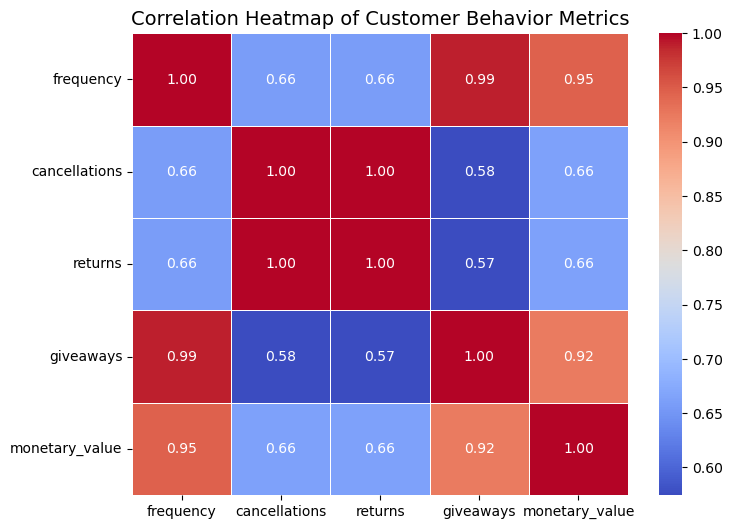

In [68]:
# Query directly in DuckDB
customer_df = db.query("""
    SELECT 
        customer_id,
        country,
        COUNT(DISTINCT invoice) AS frequency,
        SUM(isCancellation) AS cancellations,
        SUM(CASE WHEN quantity < 0 AND price != 0 THEN 1 ELSE 0 END) AS returns,
        SUM(CASE WHEN price <= 0 AND quantity > 0 THEN 1 ELSE 0 END) AS giveaways,
        SUM(Revenue) AS monetary_value
    FROM data
    WHERE customer_id IS NOT NULL
    GROUP BY customer_id, country
""").df()

# Only numeric columns
numeric_cols = ["frequency", "cancellations", "returns", "giveaways", "monetary_value"]
corr_matrix = customer_df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Customer Behavior Metrics", fontsize=14)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1464\1428013282.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


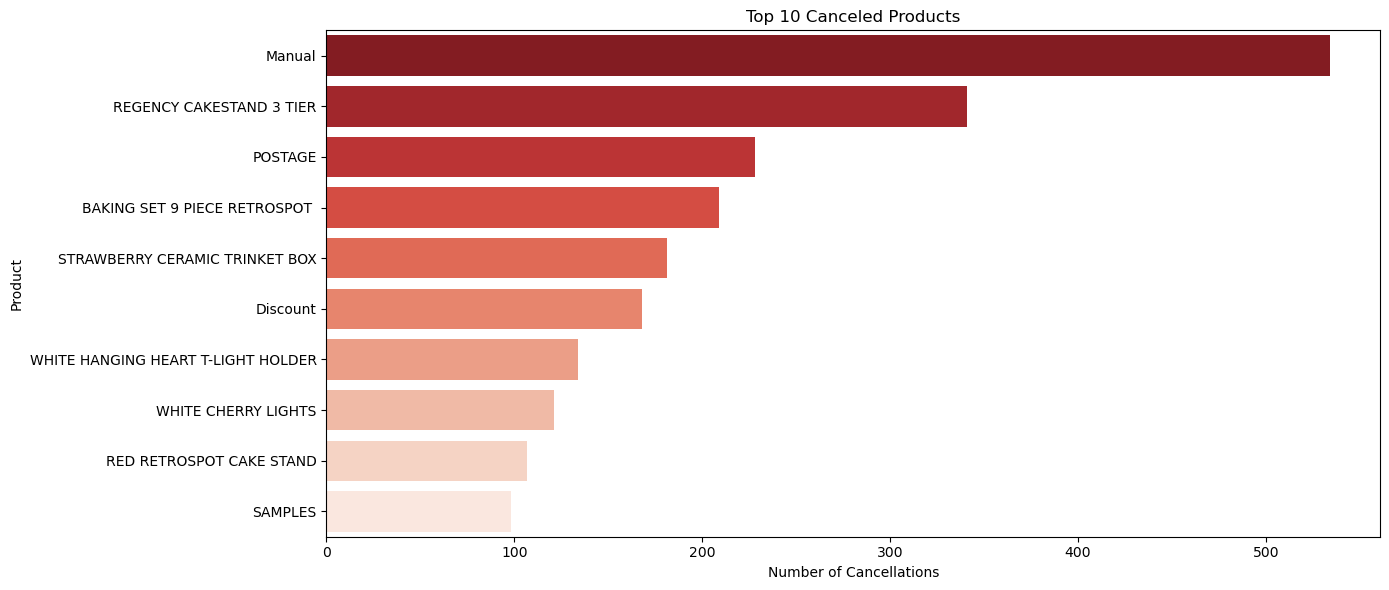

C:\Users\Admin\AppData\Local\Temp\ipykernel_1464\1428013282.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


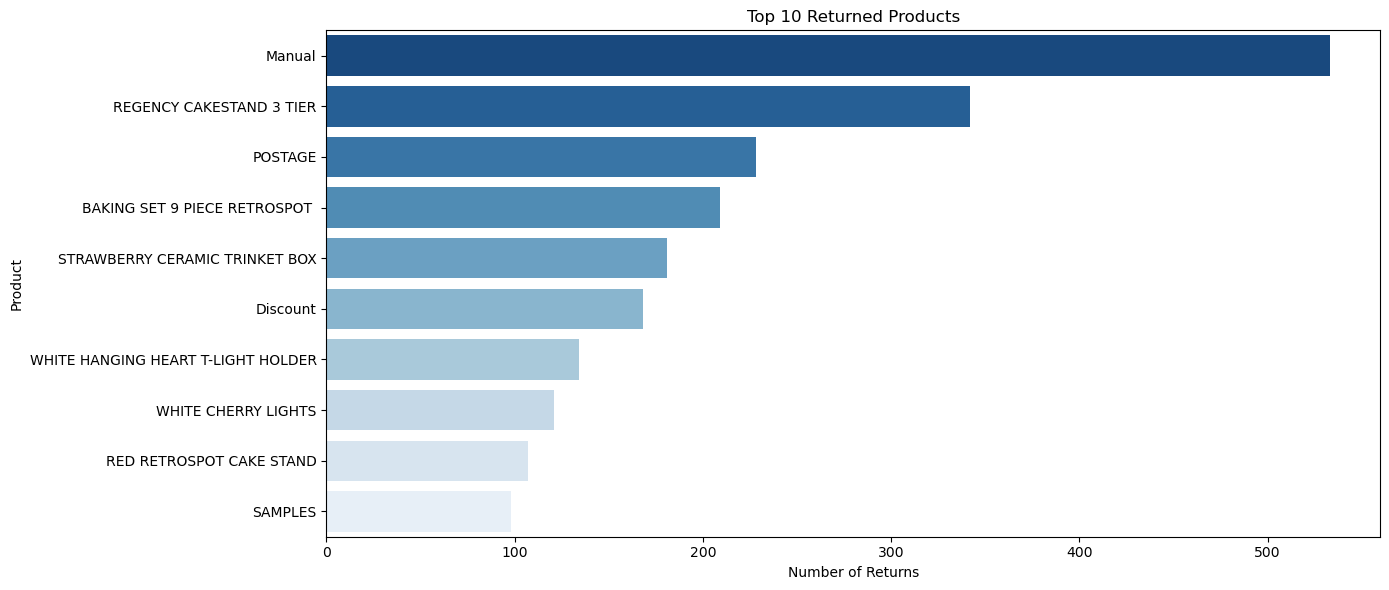

C:\Users\Admin\AppData\Local\Temp\ipykernel_1464\1428013282.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


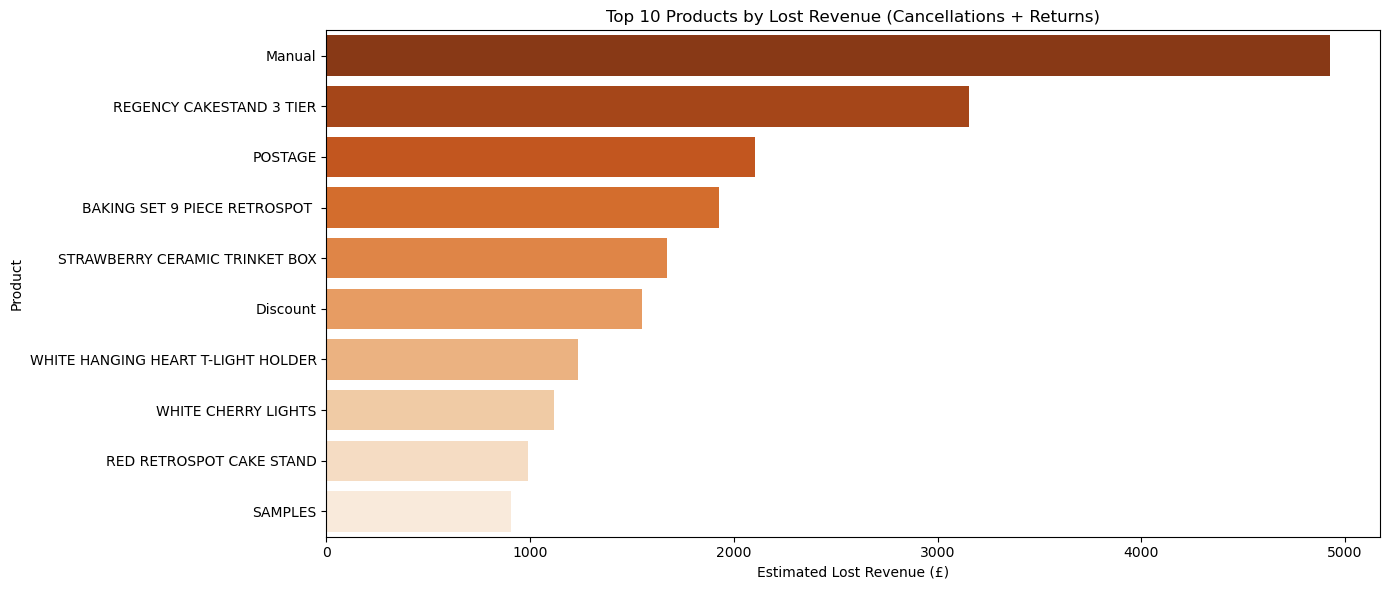

In [ ]:

        # --- Step 1: Copy + Preprocess ---
        df_prod = data.copy()
        df_prod.columns = df_prod.columns.str.strip()

        # --- Step 2: Product-Level Aggregations ---
        product_summary = (
            df_prod.groupby(["stockcode", "description"])
            .agg(
                total_transactions=("invoice", "count"),
                cancellations=("IsCancellation", "sum"),
                returns=("IsReturn", "sum"),
                giveaways=("IsGiveaway", "sum"),
                revenue=("Revenue", "sum")
            )
            .reset_index()
        )

        # --- Step 3: Derived Metrics ---
        product_summary["cancellation_rate"] = product_summary["cancellations"] / product_summary["total_transactions"]
        product_summary["return_rate"] = product_summary["returns"] / product_summary["total_transactions"]
        product_summary["giveaway_rate"] = product_summary["giveaways"] / product_summary["total_transactions"]

        # Lost revenue estimate (canceled + returned)
        product_summary["lost_revenue"] = (
            (product_summary["cancellations"] + product_summary["returns"]) * df_prod["price"].mean()
        )

        # --- Step 4: Identify Top Risk Products ---
        top_canceled = product_summary.sort_values("cancellations", ascending=False).head(10)
        top_returned = product_summary.sort_values("returns", ascending=False).head(10)
        top_lost_rev = product_summary.sort_values("lost_revenue", ascending=False).head(10)

        # --- Step 5: Visualizations ---
        plt.figure(figsize=(14, 6))
        sns.barplot(
            data=top_canceled,
            x="cancellations",
            y="description",
            palette="Reds_r"
        )
        plt.title("Top 10 Canceled Products")
        plt.xlabel("Number of Cancellations")
        plt.ylabel("Product")
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(14, 6))
        sns.barplot(
            data=top_returned,
            x="returns",
            y="description",
            palette="Blues_r"
        )
        plt.title("Top 10 Returned Products")
        plt.xlabel("Number of Returns")
        plt.ylabel("Product")
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(14, 6))
        sns.barplot(
            data=top_lost_rev,
            x="lost_revenue",
            y="description",
            palette="Oranges_r"
        )
        plt.title("Top 10 Products by Lost Revenue (Cancellations + Returns)")
        plt.xlabel("Estimated Lost Revenue (£)")
        plt.ylabel("Product")
        plt.tight_layout()
        plt.show()

        # --- Step 6: Dashboard-Ready Summary ---
        product_dashboard = product_summary.sort_values("lost_revenue", ascending=False)[
            ["stockcode", "description", "cancellations", "returns", "giveaways", "revenue", "lost_revenue", "cancellation_rate", "return_rate"]
        ].reset_index(drop=True)

        # product_dashboard.to_csv("product_summary_dashboard.csv", index=False)


C:\Users\Admin\AppData\Local\Temp\ipykernel_1464\3045384900.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  revenue_segmented = pd.concat([high_perf, low_perf_row], ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_1464\3045384900.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_segmented, x='country', y='revenue_share', palette='viridis')


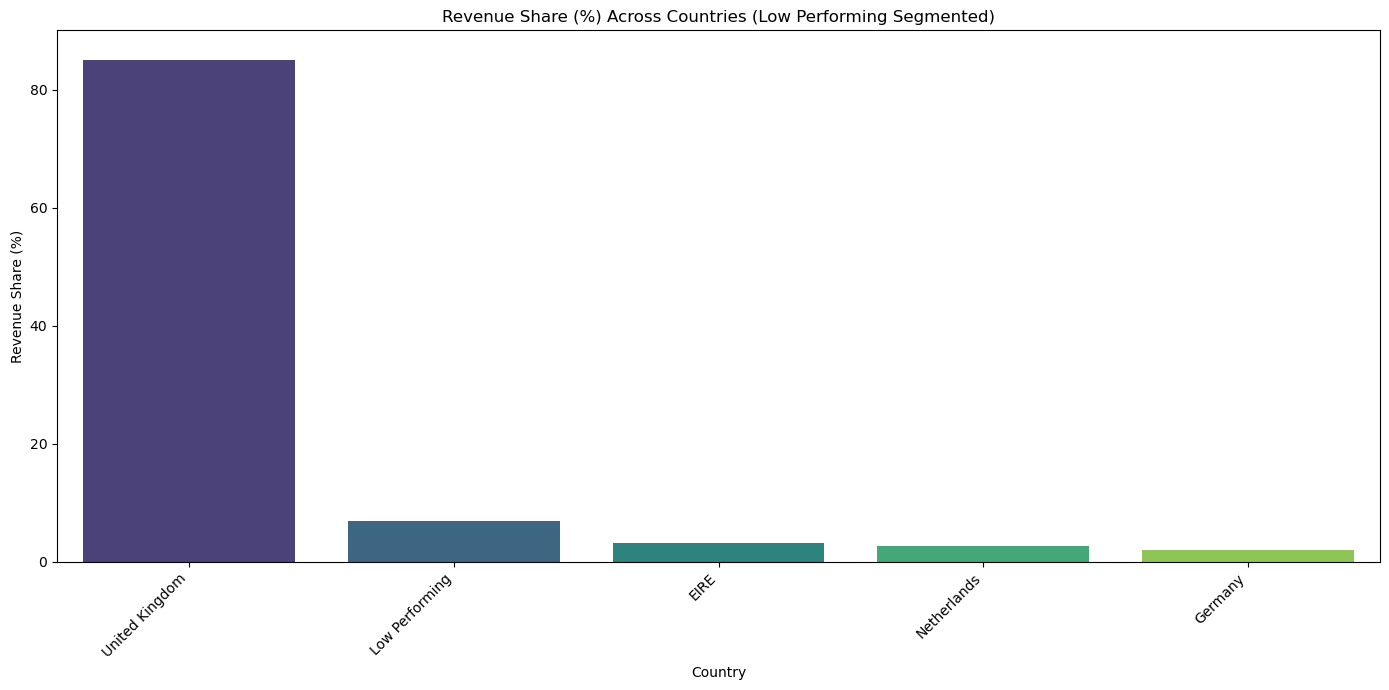

In [72]:

# Step 1: Query revenue per country
revenue = db.query("""
    SELECT country, ROUND(SUM(Revenue), 2) AS revenue
    FROM data
    WHERE price > 0 AND quantity > 0
    GROUP BY country
    ORDER BY revenue DESC
""").df()

# Step 2: Calculate total revenue and revenue share (%)
total_revenue = revenue['revenue'].sum()
revenue['revenue_share'] = (revenue['revenue'] / total_revenue) * 100

# Step 3: Define threshold for low-performing countries (e.g., less than 2% revenue share)
threshold = 2

# Step 4: Segment low performing countries
high_perf = revenue[revenue['revenue_share'] >= threshold].copy()
low_perf_share = revenue[revenue['revenue_share'] < threshold]['revenue_share'].sum()

# Step 5: Create a DataFrame row for low performing countries
low_perf_row = pd.DataFrame({
    'country': ['Low Performing'],
    'revenue': [None],  # Can also put sum of revenue if you want
    'revenue_share': [low_perf_share]
})

# Step 6: Combine high performing and low performing
revenue_segmented = pd.concat([high_perf, low_perf_row], ignore_index=True)

# Step 7: Sort by revenue_share descending
revenue_segmented = revenue_segmented.sort_values(by='revenue_share', ascending=False)

# Step 8: Plot revenue share
plt.figure(figsize=(14, 7))
sns.barplot(data=revenue_segmented, x='country', y='revenue_share', palette='viridis')

plt.title("Revenue Share (%) Across Countries (Low Performing Segmented)")
plt.xlabel("Country")
plt.ylabel("Revenue Share (%)")

plt.xticks(rotation=45, ha='right')
plt.ylim(0, revenue_segmented['revenue_share'].max() + 5)  # Add some padding on top

plt.tight_layout()
plt.show()

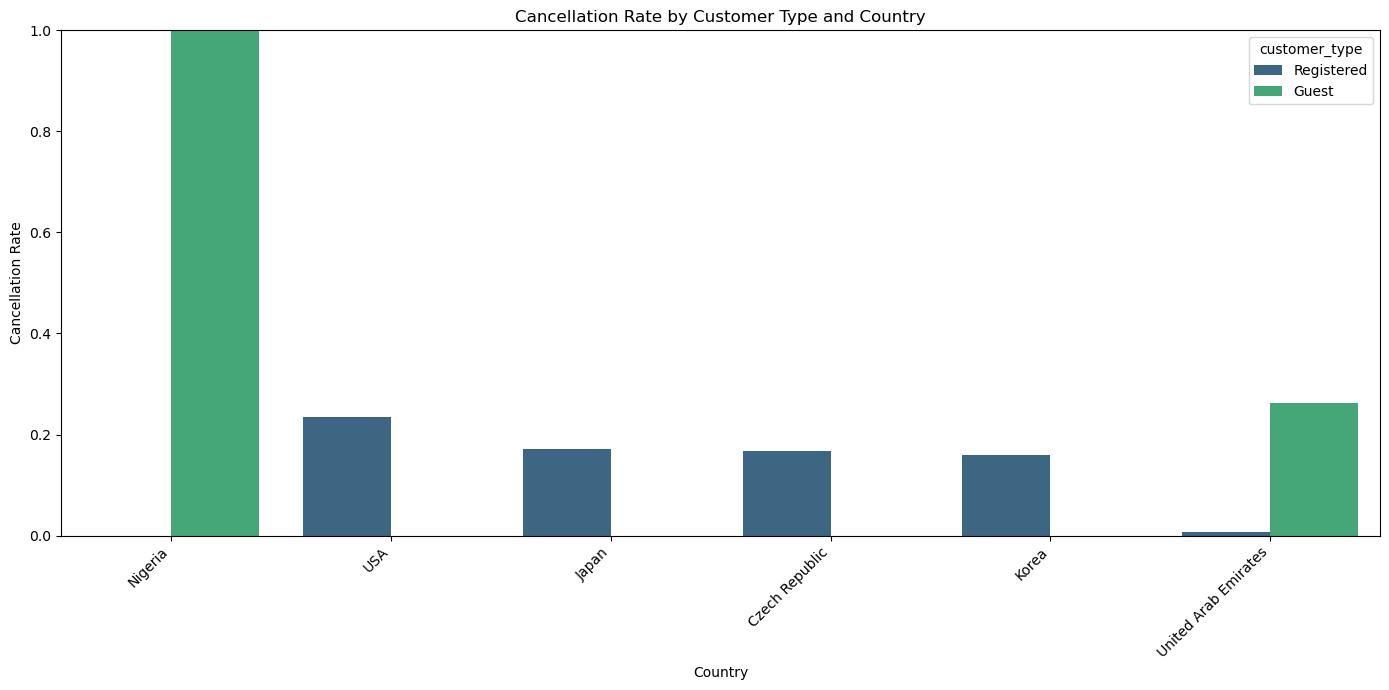

C:\Users\Admin\AppData\Local\Temp\ipykernel_1464\240747227.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")


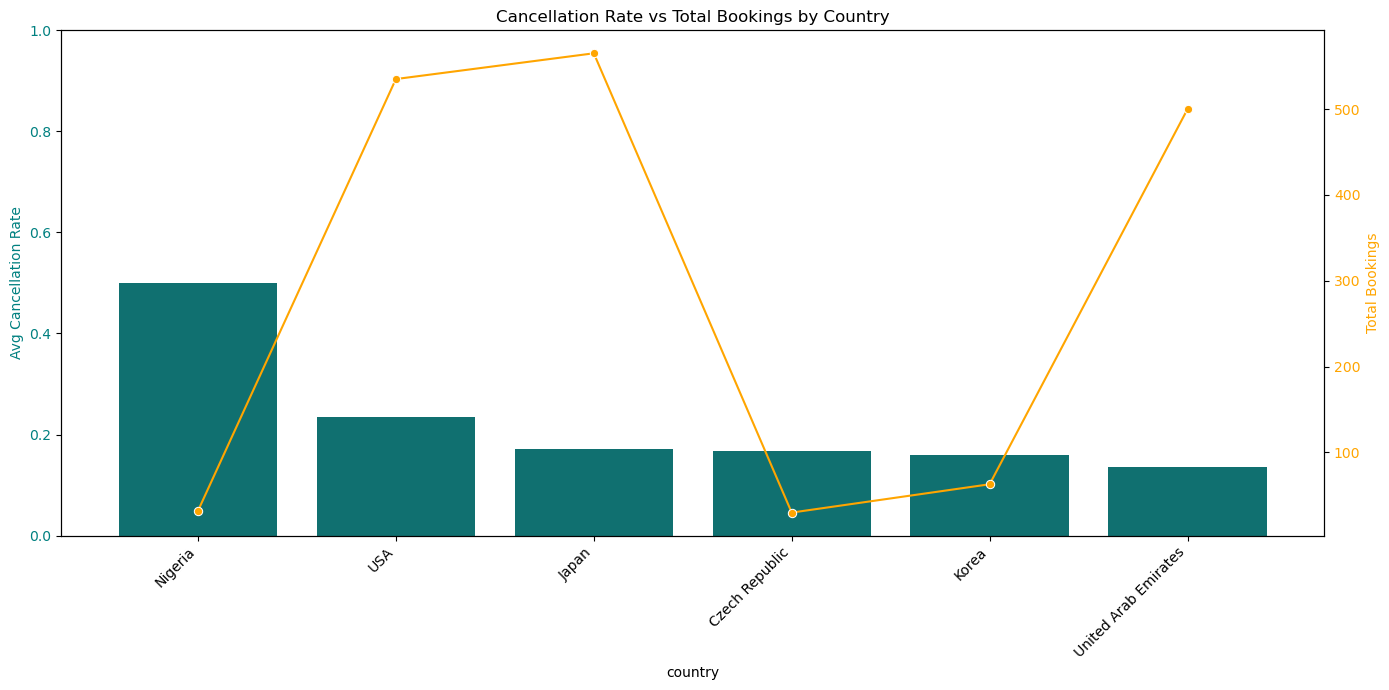

In [74]:

# --- Step 1: Copy + Preprocess ---
df_cancel = data.copy()
df_cancel.columns = df_cancel.columns.str.strip()

# Define customer type (Registered vs Guest)
df_cancel['customer_type'] = df_cancel['customer_id'].apply(
    lambda x: 'Guest' if x == 'Guest' else 'Registered'
)

# --- Step 2: Cancellation Rate Table ---
cancellation_rate = (
    df_cancel.groupby(["country", "customer_type"])
    .agg(
        cancellation_rate=("IsCancellation", "mean"),
        total_bookings=("IsCancellation", "count")
    )
    .reset_index()
)

# Pivot for filtering logic
pivot_cr = cancellation_rate.pivot(
    index='country',
    columns='customer_type',
    values='cancellation_rate'
).fillna(0)

# --- Step 3: Filter Countries (Dynamic Threshold) ---
threshold = 0.15  # can turn into dashboard slider/parameter
filtered_countries = pivot_cr[
    (pivot_cr['Guest'] >= threshold) | (pivot_cr['Registered'] >= threshold)
].index

cancellation_rate_filtered = cancellation_rate[
    cancellation_rate['country'].isin(filtered_countries)
]

# --- Step 4: Country Summary (Dashboard-Ready Table) ---
country_summary = (
    cancellation_rate_filtered
    .groupby("country")
    .agg(
        avg_cancellation_rate=("cancellation_rate", "mean"),
        total_bookings=("total_bookings", "sum")
    )
    .sort_values("avg_cancellation_rate", ascending=False)
    .reset_index()
)

# --- Step 5: Sorted Order for Plot ---
sorted_countries = country_summary["country"].tolist()

# --- Step 6: Plot Cancellation Rate by Country & Customer Type ---
plt.figure(figsize=(14, 7))
sns.barplot(
    data=cancellation_rate_filtered,
    x='country',
    y='cancellation_rate',
    hue='customer_type',
    order=sorted_countries,
    palette='viridis'
)
plt.title('Cancellation Rate by Customer Type and Country')
plt.ylabel('Cancellation Rate')
plt.xlabel('Country')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- Step 7: Optional Dual-Axis Plot (Cancellation Rate vs Bookings) ---
fig, ax1 = plt.subplots(figsize=(14, 7))

# Barplot for cancellation rate
sns.barplot(
    data=country_summary,
    x="country",
    y="avg_cancellation_rate",
    color="teal",
    ax=ax1
)
ax1.set_ylabel("Avg Cancellation Rate", color="teal")
ax1.set_ylim(0, 1)
ax1.tick_params(axis='y', labelcolor="teal")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

# Lineplot for total bookings (secondary axis)
ax2 = ax1.twinx()
sns.lineplot(
    data=country_summary,
    x="country",
    y="total_bookings",
    marker="o",
    sort=False,
    color="orange",
    ax=ax2
)
ax2.set_ylabel("Total Bookings", color="orange")
ax2.tick_params(axis='y', labelcolor="orange")

plt.title("Cancellation Rate vs Total Bookings by Country")
plt.tight_layout()
plt.show()

# --- Step 8: Export Dashboard Table (Optional) ---
# country_summary.to_csv("country_cancellation_summary.csv", index=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1464\3045384900.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  revenue_segmented = pd.concat([high_perf, low_perf_row], ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_1464\3045384900.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_segmented, x='country', y='revenue_share', palette='viridis')


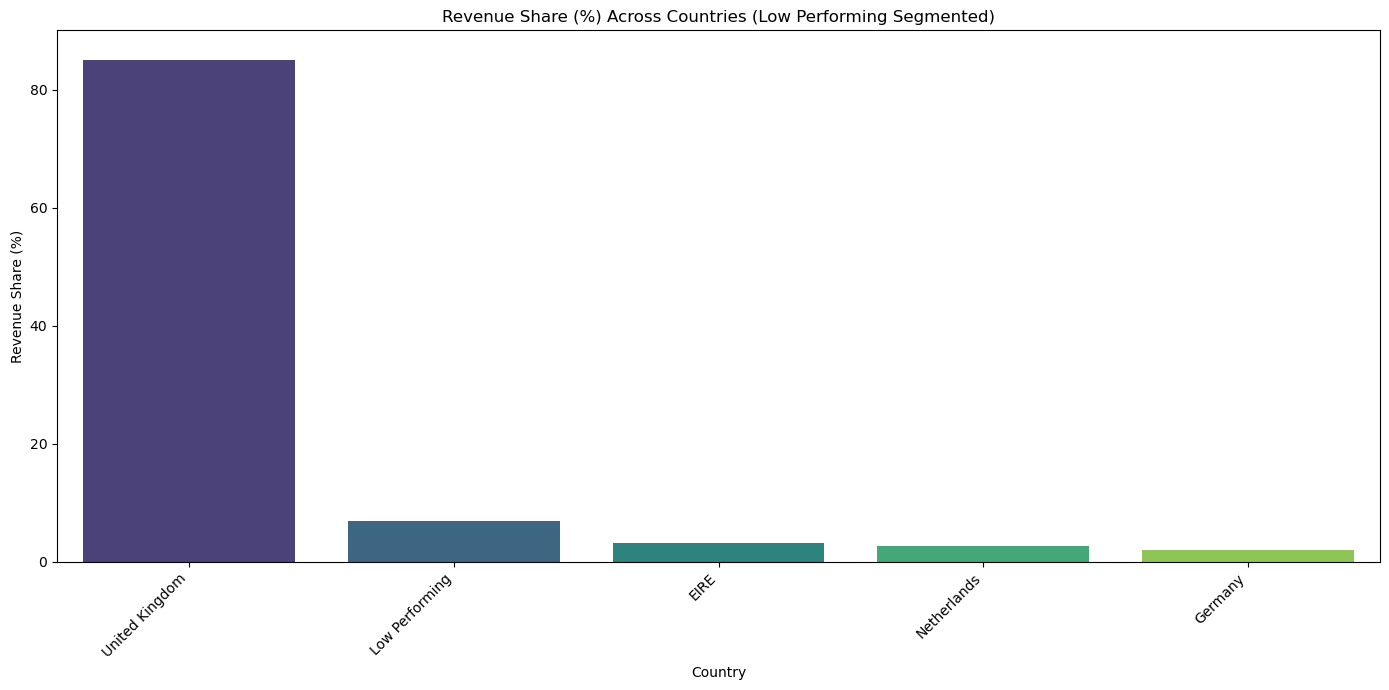

In [76]:

# Step 1: Query revenue per country
revenue = db.query("""
    SELECT country, ROUND(SUM(Revenue), 2) AS revenue
    FROM data
    WHERE price > 0 AND quantity > 0
    GROUP BY country
    ORDER BY revenue DESC
""").df()

# Step 2: Calculate total revenue and revenue share (%)
total_revenue = revenue['revenue'].sum()
revenue['revenue_share'] = (revenue['revenue'] / total_revenue) * 100

# Step 3: Define threshold for low-performing countries (e.g., less than 2% revenue share)
threshold = 2

# Step 4: Segment low performing countries
high_perf = revenue[revenue['revenue_share'] >= threshold].copy()
low_perf_share = revenue[revenue['revenue_share'] < threshold]['revenue_share'].sum()

# Step 5: Create a DataFrame row for low performing countries
low_perf_row = pd.DataFrame({
    'country': ['Low Performing'],
    'revenue': [None],  # Can also put sum of revenue if you want
    'revenue_share': [low_perf_share]
})

# Step 6: Combine high performing and low performing
revenue_segmented = pd.concat([high_perf, low_perf_row], ignore_index=True)

# Step 7: Sort by revenue_share descending
revenue_segmented = revenue_segmented.sort_values(by='revenue_share', ascending=False)

# Step 8: Plot revenue share
plt.figure(figsize=(14, 7))
sns.barplot(data=revenue_segmented, x='country', y='revenue_share', palette='viridis')

plt.title("Revenue Share (%) Across Countries (Low Performing Segmented)")
plt.xlabel("Country")
plt.ylabel("Revenue Share (%)")

plt.xticks(rotation=45, ha='right')
plt.ylim(0, revenue_segmented['revenue_share'].max() + 5)  # Add some padding on top

plt.tight_layout()
plt.show()